In [1]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [2]:
model = VGG16()

model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
count=0
features = {}
directory ='../Images'
print(directory)
for img_name in os.listdir('../Images'):
  
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))

    image = img_to_array(image)

    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    image = preprocess_input(image)

    feature = model.predict(image, verbose=0)

    image_id = img_name.split('.')[0]
    print(image_id)
    count+=1
    print(count)
    
    features[image_id] = feature

../Images
1000268201_693b08cb0e
1
1001773457_577c3a7d70
2
1002674143_1b742ab4b8
3
1003163366_44323f5815
4
1007129816_e794419615
5
1007320043_627395c3d8
6
1009434119_febe49276a
7
1012212859_01547e3f17
8
1015118661_980735411b
9
1015584366_dfcec3c85a
10
101654506_8eb26cfb60
11
101669240_b2d3e7f17b
12
1016887272_03199f49c4
13
1019077836_6fc9b15408
14
1019604187_d087bf9a5f
15
1020651753_06077ec457
16
1022454332_6af2c1449a
17
1022454428_b6b660a67b
18
1022975728_75515238d8
19
102351840_323e3de834
20
1024138940_f1fefbdce1
21
102455176_5f8ead62d5
22
1026685415_0431cbf574
23
1028205764_7e8df9a2ea
24
1030985833_b0902ea560
25
103106960_e8a41d64f8
26
103195344_5d2dc613a3
27
103205630_682ca7285b
28
1032122270_ea6f0beedb
29
1032460886_4a598ed535
30
1034276567_49bb87c51c
31
104136873_5b5d41be75
32
1042020065_fb3d3ba5ba
33
1042590306_95dea0916c
34
1045521051_108ebc19be
35
1048710776_bb5b0a5c7c
36
1052358063_eae6744153
37
105342180_4d4a40b47f
38
1053804096_ad278b25f1
39
1055623002_8195a43714
40
10557533

134894450_dadea45d65
323
1348947380_14f0fc1237
324
1348957576_c4a78eb974
325
1350811702_2ce7cfd0c5
326
1350948838_fdebe4ff65
327
1351315701_6580b51c41
328
1351764581_4d4fb1b40f
329
135235570_5698072cd4
330
1352398363_9cc8ffcce9
331
1352410176_af6b139734
332
1354318519_2f9baed754
333
1355450069_c0675b0706
334
1355703632_5683a4b6fb
335
1355833561_9c43073eda
336
1355935187_2c99648138
337
1355945307_f9e01a9a05
338
1356543628_c13ebe38fb
339
1356796100_b265479721
340
1357689954_72588dfdc4
341
1357724865_4faf4e1418
342
1357753846_6185e26040
343
1358089136_976e3d2e30
344
1358892595_7a37c45788
345
1359101233_16c2c150e3
346
1361420539_e9599c60ae
347
1362128028_8422d53dc4
348
1363843090_9425d93064
349
1363924449_487f0733df
350
136552115_6dc3e7231c
351
136639119_6040b00946
352
136644343_0e2b423829
353
136644885_f7d2bbf546
354
1368338041_6b4077ca98
355
1368383637_614646cc4a
356
136886677_6026c622eb
357
1370615506_2b96105ca3
358
1370773415_967b1ffde1
359
1377668044_36398401dd
360
1378557186_4bd1da68

1626754053_81126b67b6
641
162743064_bb242faa31
642
1643915227_9f48068772
643
1650280501_29810b46e5
644
1655781989_b15ab4cbff
645
1659358133_95cd1027bd
646
1659358141_0433c9bf99
647
1659396176_ced00a549f
648
1662261486_db967930de
649
166321294_4a5e68535f
650
1663454406_5e2cf8c5bb
651
1663751778_90501966f0
652
166433861_70b66cd381
653
166507476_9be5b9852a
654
166654939_80ea4ddbcc
655
1670592963_39731a3dac
656
167295035_336f5f5f27
657
1674612291_7154c5ab61
658
1675679141_36c9bc2969
659
1676601498_7d59327523
660
1679557684_50a206e4a9
661
1679565118_d36f0d6d52
662
1679617928_a73c1769be
663
1680126311_b92a2e8e72
664
1682079482_9a72fa57fa
665
1683444418_815f660379
666
1685463722_55843b6d3c
667
1685990174_09c4fb7df8
668
1688699579_2f72328c7e
669
1689658980_0074d81d28
670
1691573772_1adef8e40e
671
169490297_b6ff13632a
672
170100272_d820db2199
673
1713248047_d03721456d
674
1713248099_d860df4e10
675
1714316707_8bbaa2a2ba
676
171488318_fb26af58e2
677
1716445442_9cf3528342
678
1718184338_5968d88edb

2086678529_b3301c2d71
959
2087317114_cf06df5aa5
960
2087640654_1a84577a44
961
2088120475_d6318364f5
962
2088460083_42ee8a595a
963
2088532947_c628e44c4a
964
2088910854_c6f8d4f5f9
965
2089122314_40d5739aef
966
2089350172_dc2cf9fcf6
967
2089426086_7acc98a3a8
968
2089442007_6fc798548c
969
2089539651_9e518ec7de
970
2089542487_b4c1ee7025
971
2089555297_95cf001fa7
972
2090327868_9f99e2740d
973
2090339522_d30d2436f9
974
2090386465_b6ebb7df2c
975
2090387793_274ab4cf7d
976
2090545563_a4e66ec76b
977
2090723611_318031cfa5
978
2090997177_76d482b158
979
2091171488_c8512fec76
980
2092177624_13ab757e8b
981
2092419948_eea8001d0f
982
2092870249_90e3f1855b
983
2094323311_27d58b1513
984
2094543127_46d2f1fedf
985
2094810449_f8df9dcdf7
986
2095007523_591f255708
987
2095078658_c14ba89bc2
988
2095435987_1b7591d214
989
2095444126_201ff9f222
990
2095478050_736c4d2d28
991
209605542_ca9cc52e7b
992
2096771662_984441d20d
993
2097398349_ff178b3f1b
994
2097403787_77a154f5b9
995
2097407245_c798e0dcaf
996
2097420505_43

2225231022_1632d0a5aa
1265
2225241766_f1e7132e3e
1266
2225864432_48a24f49a4
1267
2226440063_c085b30558
1268
2226534154_cbcab7ba32
1269
2226587791_66e29dd01d
1270
222759342_98294380fc
1271
2228022180_9597b2a458
1272
2228167286_7089ab236a
1273
222878446_32c6fc4bc9
1274
2229177914_3308fe7d20
1275
2229179070_dc8ea8582e
1276
2229509318_be3fef006b
1277
2230067846_74046b89d3
1278
2231847779_1148d1c919
1279
2232518012_8cb0bbc43b
1280
223299137_b0e81ac145
1281
223299142_521aedf9e7
1282
2233426944_0959835ced
1283
2234702530_a265a4df22
1284
2234910971_80e0325918
1285
2236016316_f476cbbf06
1286
2238019823_79318d1f11
1287
2238166082_140f8b01b8
1288
2238759450_6475641bdb
1289
2239938351_43c73c887c
1290
224026428_0165164ceb
1291
2240539658_dea8db6e55
1292
2241768909_3d96d48417
1293
2242178517_2325b85e5f
1294
224273695_0b517bd0eb
1295
2242863004_3a9f82a31f
1296
224369028_b1ac40d1fa
1297
2243904502_2d265fed80
1298
2244024374_54d7e88c2b
1299
2244171992_a4beb04d8e
1300
2244551043_21b8cca866
1301
22446134

2337809114_899ba61330
1570
2337919839_df83827fa0
1571
2338627102_6708a9b4fd
1572
2339106348_2df90aa6a9
1573
2339140905_9f625f140a
1574
2339516180_12493e8ecf
1575
2339573065_91f1e3be60
1576
2339946012_06bd480ab8
1577
2340206885_58754a799a
1578
2340919359_f56787d307
1579
2341254813_c53a5ef27a
1580
234241682_51d9fabb27
1581
2342478660_faef1afea8
1582
2343525685_3eba3b6686
1583
2343879696_59a82f496f
1584
2344412916_9a5a9b1c82
1585
23445819_3a458716c1
1586
2344699642_4fae2f4e07
1587
2344875609_8e172d682b
1588
2344898759_5674382bcd
1589
2345984157_724823b1e4
1590
2346189044_546ed84aa9
1591
2346401538_f5e8da66fc
1592
2346402952_e47d0065b6
1593
2346523971_d3f1e12ce4
1594
2346629210_8d6668d22d
1595
2346772831_b2748ba1f0
1596
2347921097_f2e35753c0
1597
2348491126_30db0d46ef
1598
2348924378_47e556d81a
1599
2350400382_ced2b6c91e
1600
235065283_1f9a3c79db
1601
235074044_c1358888ed
1602
2351479551_e8820a1ff3
1603
2351762979_0941aecced
1604
2352414953_10f3cd0f1f
1605
2353088412_5e5804c6f5
1606
235310

2432709509_2a4d0c833f
1877
2433175169_da939372f2
1878
2434006663_207a284cec
1879
2434074318_e35a567220
1880
2435166927_28b8130660
1881
2435685480_a79d42e564
1882
2436081047_bca044c1d3
1883
2436160351_108924a65b
1884
2436398074_8737f40869
1885
2437266971_b91a8f9a00
1886
2438085746_588dce8724
1887
2439031566_2e0c0d3550
1888
2439154641_bbf985aa57
1889
2439384468_58934deab6
1890
2439813616_c9ac54cc9f
1891
2441313372_6a1d59582b
1892
2441354291_b32e00e5a6
1893
2441629086_52f68eb316
1894
2441815792_43565b1312
1895
2442243868_abe8f74fb4
1896
2443229844_277cded27d
1897
2443380641_7b38d18f5b
1898
2443512473_6f5a22eb42
1899
244368383_e90b6b2f20
1900
244399048_8332bb3270
1901
2444134813_20895c640c
1902
2444339090_bf7b3211f4
1903
244443352_d7636e1253
1904
2444741900_5cb3ef3e1d
1905
2444821454_22a346c996
1906
2444935470_7b0226b756
1907
2445283938_ff477c7952
1908
2445442929_8c81d42460
1909
2445654384_4ee3e486e1
1910
244571201_0339d8e8d1
1911
2445783904_e6c38a3a3d
1912
2446315531_7c9704eec0
1913
24466

2531837969_6f28637811
2183
2531942624_c3c072064e
2184
2532262109_87429a2cae
2185
2532294586_4cd76a837d
2186
2533010184_ef2fd71297
2187
2533076864_d799996433
2188
2533414541_362bf043bb
2189
2533424347_cf2f84872b
2190
2533642917_a5eace85e6
2191
2534194182_ac53035cf4
2192
2534424894_ccd091fcb5
2193
2534502836_7a75305655
2194
2534652796_c8a23288ab
2195
2535746605_8124bf4e4f
2196
2537119659_fa01dd5de5
2197
2537197415_af7c30dfc8
2198
2537583012_4a358a6a8a
2199
253762507_9c3356c2f6
2200
2538423833_d1f492d1fb
2201
2538477523_1da77eb11c
2202
2539933563_17ff0758c7
2203
2540203582_9a9ac92a5d
2204
2540326842_bb26cec999
2205
2540360421_f7c2401da8
2206
2540750172_070250ece5
2207
2540751930_d71c7f5622
2208
2540757246_5a849fbdcb
2209
2540884723_03d60ef548
2210
2541104331_a2d65cfa54
2211
2541701582_0a651c380f
2212
2541901399_0a57f4cc76
2213
2542037086_58c833699c
2214
2542415282_9240e1b5fc
2215
2542662402_d781dd7f7c
2216
254295381_d98fa049f4
2217
2543017787_9720b4fa1c
2218
2543247940_083f1b7969
2219
254

263233914_d25004e4cd
2488
2632366677_43dee456a5
2489
2632381125_de32bdfdf6
2490
2633082074_32c85f532c
2491
2633201394_ee4a7666ed
2492
2633722629_5eeb649c09
2493
2635023078_6dae04758f
2494
2635164923_2a774f7854
2495
263522013_d118d46b2d
2496
2635400219_2e1a984fd3
2497
2635483351_bc1a8273aa
2498
2635905544_dbc65d0622
2499
2635908229_b9fc90d3fb
2500
2635938723_11b85e6763
2501
2636514498_01fcc5f501
2502
2636876892_9353521a1c
2503
2637510448_4521cf6f29
2504
2637904605_fc355816fc
2505
2637959357_dd64a03efa
2506
2638369467_8fc251595b
2507
263850317_5bb3a18a08
2508
263854883_0f320c1562
2509
2638981862_6b23833f37
2510
2640000969_b5404a5143
2511
2640153227_57cf1a3d92
2512
2641288004_30ce961211
2513
264141937_585320617a
2514
2641770481_c98465ff35
2515
2642350864_099c0f2152
2516
2642474867_4e6346f809
2517
2642475077_69d19deb74
2518
2642688531_8fb68b2147
2519
2643263887_a32ffb878f
2520
2643309379_2cde08516c
2521
2644326817_8f45080b87
2522
2644430445_47c985a2ee
2523
2644916196_16f91dae54
2524
264492

2733659177_d74a00995b
2793
2734219983_fe86a60bf9
2794
2734669176_c272b42597
2795
2735158990_56ff6bf9b0
2796
2735290454_1bd8bc5eac
2797
2735558076_0d7bbc18fc
2798
2735792721_b8fe85e803
2799
2735979477_eef7c680f9
2800
2736508369_fd9ff0b42f
2801
2736902411_a0010f89ae
2802
2737233999_34d60dc5c3
2803
2737609659_efce872c24
2804
2737729252_b3fd9c05b1
2805
2737759676_4bc9be2daf
2806
2738077433_10e6264b6f
2807
2738255684_0324ed062d
2808
2739331794_4ae78f69a0
2809
2739332078_13d9acce59
2810
2741051940_89fb6b2cee
2811
2741380826_cfe0ddf0a9
2812
2742426734_291df6da08
2813
274313927_404d0e94ab
2814
2743652730_d909c7ae82
2815
2743709828_a795a75bfc
2816
2744321686_8811d8428c
2817
2744330402_824240184c
2818
2744600462_5804577296
2819
2744690159_fe2c89e55b
2820
2744705147_acd767d3eb
2821
2744705574_519c171ca0
2822
2745441424_5659f6acc8
2823
2745663684_650f84e1e6
2824
2745811124_12c4426b8b
2825
2746072388_b127f8259b
2826
2746839158_4195210d27
2827
2746910139_77ba5be2c5
2828
2747436384_9470c56cb9
2829
27

2846037553_1a1de50709
3098
2846785268_904c5fcf9f
3099
2846843520_b0e6211478
3100
2847514745_9a35493023
3101
2847615962_c330bded6e
3102
2847859796_4d9cb0d31f
3103
2848266893_9693c66275
3104
2848571082_26454cb981
3105
2848895544_6d06210e9d
3106
2848977044_446a31d86e
3107
2849194983_2968c72832
3108
2850719435_221f15e951
3109
2851198725_37b6027625
3110
2851304910_b5721199bc
3111
2851931813_eaf8ed7be3
3112
2852982055_8112d0964f
3113
285306009_f6ddabe687
3114
2853205396_4fbe8d7a73
3115
2853407781_c9fea8eef4
3116
2853743795_e90ebc669d
3117
2853811730_fbb8ab0878
3118
2854207034_1f00555703
3119
2854234756_8c0e472f51
3120
2854291706_d4c31dbf56
3121
2854959952_3991a385ab
3122
2855417531_521bf47b50
3123
2855594918_1d1e6a6061
3124
2855667597_bf6ceaef8e
3125
2855695119_4342aae0a3
3126
2855727603_e917ded363
3127
285586547_c81f8905a1
3128
2855910826_d075845288
3129
2856080862_95d793fa9d
3130
2856252334_1b1a230e70
3131
2856456013_335297f587
3132
2856524322_1d04452a21
3133
2856699493_65edef80a1
3134
285

2924884815_63826aa60d
3402
2924884899_f512c84332
3403
2924908529_0ecb3cdbaa
3404
2925242998_9e0db9b4a2
3405
2925577165_b83d31a7f6
3406
2925737498_57585a7ed9
3407
2925760802_50c1e84936
3408
2926233397_71e617f3a3
3409
2926595608_69b22be8d4
3410
2926786902_815a99a154
3411
292780636_72e1968949
3412
2927878881_90b42fc444
3413
2928152792_b16c73434a
3414
2928835996_88b9f9503d
3415
292887910_f34ac101c8
3416
2929006980_9f9f8f3d21
3417
2929272606_2a5923b38e
3418
2929405404_1dff5ab847
3419
2929506802_5432054d77
3420
2929669711_b2d5a640f0
3421
2930318834_8366811283
3422
2930514856_784f17064a
3423
2930580341_d36eec8e3c
3424
2930616480_7fd45ca79b
3425
2930622766_fa8f84deb1
3426
2931254547_e97c6d0d63
3427
293151893_ee7249eccb
3428
2931950813_93145c4746
3429
2932498509_27cb0038ec
3430
2932519416_11f23b6297
3431
2932740428_b15384f389
3432
293327462_20dee0de56
3433
2933637854_984614e18b
3434
2933643390_1c6086684b
3435
2933912528_52b05f84a1
3436
2934000107_d2ff15c814
3437
2934022873_3fdd69aee4
3438
29341

3016741474_72b4355198
3707
3016759846_062663f8ab
3708
3017203816_5dc2a6b392
3709
3017220118_6a9212dfdb
3710
3017373346_3a34c3fe9d
3711
3017521547_f5ef8848e3
3712
3017656907_c3b137e070
3713
3018304737_0a46fc5f1d
3714
3018467501_a03d404413
3715
3018847610_0bf4d7e43d
3716
3019199755_a984bc21b1
3717
3019473225_8e59b8ec4e
3718
3019609769_c7809177f6
3719
3019667009_20db160195
3720
3019842612_8501c1791e
3721
3019857541_3de3e24f54
3722
3019917636_4e0bb0acc4
3723
3019923691_3b3c5a4766
3724
3019986034_7453777274
3725
3021318991_fa28e3bca7
3726
3021780428_497542a072
3727
302241178_a582c1b953
3728
3023178539_836b50cd43
3729
3024022266_3528c16ed8
3730
3024172109_a10198e1dd
3731
3025315215_a5d367971a
3732
3025334206_76888792e5
3733
3025438110_40af7e6a80
3734
3025495499_b15797b452
3735
3025513877_1a6160070d
3736
3025546819_ce031d2fc3
3737
3025549604_38b86198f5
3738
3026102616_3cf350af9e
3739
3027009366_c8362521e8
3740
3027365101_3818be6e16
3741
3027397797_4f1d305ced
3742
3027399066_ca85495775
3743
30

3097776588_312932e438
4012
3098336319_a7e5b061d0
4013
3098707588_5096d20397
4014
3098714492_19939e3b19
4015
3098824948_23c31df031
4016
3099091086_f75f0ce09d
4017
3099264059_21653e2536
4018
3099504809_565e17e49d
4019
3099694681_19a72c8bdc
4020
3099923914_fd450f6d51
4021
3099965396_2a0018cb9e
4022
3100251515_c68027cc22
4023
3100442775_6e2659b973
4024
3101378069_f8caa14c0a
4025
3101796900_59c15e0edc
4026
310213587_778fe8fb5b
4027
3102204862_f1d220230b
4028
3102363657_dc95fe6850
4029
310260324_7f941814bc
4030
3103185190_eb8729c166
4031
3103231330_db98b14501
4032
3103264875_2a8d534abc
4033
3103340819_46de7954a9
4034
3103587323_7f093d5b90
4035
3104182973_5bb1c31275
4036
3104400277_1524e4f758
4037
3104690333_4314d979de
4038
3104909823_0f41dd8be6
4039
3105315670_5f86f73753
4040
3105623068_392b767a7b
4041
3105691757_817083b0a6
4042
3105929913_94a6882e25
4043
3106026005_473a7b1c8c
4044
3106223494_52d4d2d75d
4045
3106340185_80d0cb770a
4046
3106562372_e349a27764
4047
3106782647_b078830a9e
4048
310

3170110692_d1e0e66cee
4317
3170551725_1276644eab
4318
3170802797_3c851bb475
4319
3170856184_efabfd0297
4320
3170897628_3054087f8c
4321
3171035252_dba286ae5c
4322
3171066023_ec60ba30f3
4323
317109978_cb557802e1
4324
3171188674_717eee0183
4325
3171250845_5ae0d2a8bc
4326
3171347658_f0d5469c56
4327
3171451305_f87b9e09ee
4328
3171651115_e07b9d08f6
4329
3172280520_e7655fb596
4330
3172283002_3c0fc624de
4331
3172369593_eb4d787ffb
4332
3172384527_b107385a20
4333
3173014908_b3e69594b6
4334
3173157541_70b16b4318
4335
3173215794_6bdd1f72d4
4336
3173461705_b5cdeef1eb
4337
317383917_d8bfa350b6
4338
3173928684_4ea0ee5114
4339
3173976185_8a50123050
4340
3174156702_95a1cda2d9
4341
3174196837_800689a2f3
4342
3174228611_6cf9d2266b
4343
3174417550_d2e6100278
4344
3174431688_ae84778db0
4345
3174453534_fcc927c647
4346
3174713468_e22fa7779e
4347
3174726084_c108de0a64
4348
317488612_70ac35493b
4349
3175434849_859f09fe07
4350
3175446111_681a89f873
4351
3175712926_5a470d0886
4352
3175849727_bf30b892cb
4353
3176

3229821595_77ace81c6b
4622
3229898555_16877f5180
4623
3229913073_e7857a5966
4624
3230101918_7d81cb0fc8
4625
3230132205_dccfafa5ee
4626
3231237864_8cb1c6d863
4627
3231575742_31732664cf
4628
3231596071_f0c522a639
4629
3231751379_10ebf7150c
4630
3231880001_193a579b97
4631
3232030272_b2480a5fe7
4632
3232252882_05db7c2216
4633
3232470286_903a61ea16
4634
3234115903_f4dfc8fc75
4635
3234375022_1464ea7f8a
4636
3234401637_84e0d14414
4637
3234719720_5bb2fc5ffa
4638
3234890865_bb3c316968
4639
3235076435_1eaa40bd0a
4640
3235542079_2fcf4951a1
4641
3235746553_a40416c00e
4642
3236447445_eecafdf4f0
4643
323657582_b6b6d8f7bd
4644
3236677456_75821e3583
4645
3237760601_5334f3f3b5
4646
3238654429_d899e34287
4647
3238951136_2a99f1a1a8
4648
3239021459_a6b71bb400
4649
3239480519_22540b5016
4650
3239866450_3f8cfb0c83
4651
3240014971_ee2ea8406f
4652
3240048764_acce8af2a5
4653
3240090389_97a8c5d386
4654
3240094420_a9eea11d39
4655
3240351042_5d29c94b0e
4656
3240558825_cd859d6230
4657
3241487502_f4f0cc4a8a
4658
32

3291587911_81fc33300e
4926
3292016893_24d14c8b4f
4927
3292277400_f95cdd13d1
4928
3293018193_e4e0c8db7c
4929
3293596075_973b0bfd08
4930
3293642024_e136b74a55
4931
3293751136_b0ce285dc3
4932
3293751640_d81a6f3a0c
4933
3293753378_7a8ddb98b2
4934
3293945284_6a04e477a9
4935
3294179574_4f67e67d6f
4936
3294202771_e8ee78a439
4937
3294209955_a1f1e2cc19
4938
3294717824_3bb7b5d1c8
4939
3294830188_e46bd9b93c
4940
3294952558_96bb8c8cf3
4941
3294964868_16f4f9fa9d
4942
3295024992_887a95c700
4943
3295391572_cbfde03a10
4944
3295418287_5d590dac43
4945
3295452057_0c987f895f
4946
3295671644_0e10891b6d
4947
3295680663_af21ea648b
4948
3296124052_6f1d1c9f8d
4949
3296150666_aae2f64348
4950
3296226598_1c892c4351
4951
3296500180_0d7a6650dc
4952
3296584432_bef3c965a3
4953
3296715418_29542dcdc2
4954
3297272270_285b8878b2
4955
3297323827_f582356478
4956
3298175192_bbef524ddc
4957
3298199743_d8dd8f94a0
4958
3298233193_d2a550840d
4959
3299418821_21531b5b3c
4960
3299820401_c2589186c5
4961
3300019891_8f404d94a1
4962
3

3353400143_8b9543f7dc
5230
3353950389_1153d5e452
5231
3353962769_ba48691bc6
5232
3354063643_1d8814eb13
5233
3354075558_3b67eaa502
5234
3354200211_35348e47d8
5235
3354330935_de75be9d2f
5236
3354414391_a3908bd4ff
5237
3354474353_daf9e168cf
5238
3354489242_dd529ffa1f
5239
3354883962_170d19bfe4
5240
3355494822_61353a224d
5241
3355683198_715fb1a2ac
5242
3355756569_b430a29c2a
5243
3355827928_c96c0c3e88
5244
335588286_f67ed8c9f9
5245
3356284586_21c6f155a5
5246
3356369156_074750c6cc
5247
3356494271_6103d0b556
5248
3356642567_f1d92cb81b
5249
3356700488_183566145b
5250
3356748019_2251399314
5251
3356901257_83811a19eb
5252
3356938707_d95ba97430
5253
3357194782_c261bb6cbf
5254
3357416302_fcfcdd7b86
5255
3357708906_fb3a54dd78
5256
3357937209_cf4a9512ac
5257
3358380484_b99b48f0c9
5258
3358558292_6ab14193ed
5259
3358621566_12bac2e9d2
5260
3358682439_be4b83544c
5261
3359089834_263e529c71
5262
3359530430_249f51972c
5263
3359551687_68f2f0212a
5264
3359563671_35b67898e7
5265
3359587274_4a2b140b84
5266
33

3420323191_d66e003264
5534
3420338549_bd78d35243
5535
3420469425_2980b4cd30
5536
3421104520_6a71185b3c
5537
3421129418_088af794f7
5538
3421131122_2e4bde661e
5539
3421177332_a05741cfa4
5540
3421480658_b3518b6819
5541
3421547427_53411b6278
5542
3421706363_a3e22a4908
5543
3421789737_f625dd17ed
5544
3421928157_69a325366f
5545
3422146099_35ffc8680e
5546
3422219732_3d0be52cc3
5547
3422394336_e465f60b7c
5548
3422458549_f3f3878dbf
5549
3422979565_e08cd77bfe
5550
3423225860_16e26eef74
5551
3423249426_02bedf9260
5552
3423509305_e399d005db
5553
3423802527_94bd2b23b0
5554
3424424006_98f9d1921c
5555
3424605029_53078d3505
5556
3424851862_0f51c42922
5557
3424927725_c4d1fcfac3
5558
3424934891_69f18da66e
5559
3425061393_d093edb8da
5560
3425069551_aba046a1b6
5561
3425071001_e7c9809ef2
5562
3425127583_611200619a
5563
3425414048_fa14d33067
5564
3425573919_409d9e15b2
5565
3425662680_41c7c50e8d
5566
3425685827_03683e8e5a
5567
3425756814_13909354d4
5568
3425835357_204e620a66
5569
3425846980_912943b4f9
5570
3

3475552729_a3abd81ee6
5838
3475581086_a533567561
5839
3476237185_9389c536a3
5840
3476381830_3751dd9339
5841
3476451861_5b9c9ce191
5842
3476709230_6439305bf2
5843
3477315700_52a4d740a5
5844
3477369101_8e0c61d8f4
5845
3477672764_7f07657a26
5846
3477681171_b1bb8b211d
5847
3477683327_d9e6a2a64f
5848
3477712686_8428614c75
5849
3477715432_79d82487bb
5850
3477778668_81ff0a68e0
5851
3477977145_4df89d69a1
5852
3478084305_9e1219c3b6
5853
3478176372_7c510a0cef
5854
3478591390_b526580644
5855
3478877323_0a507a601b
5856
3479050296_65bcea69a0
5857
3479245321_6a5bc470f8
5858
3479423813_517e93a43a
5859
3480051754_18e5802558
5860
3480052428_c034b98a08
5861
3480126681_52cea26bda
5862
3480379024_545e8ec818
5863
3481859121_3d3e566ec0
5864
3481884992_45770ec698
5865
3482062809_3b694322c4
5866
3482237861_605b4f0fd9
5867
3482314155_bd1e668b4e
5868
3482474257_a88bfe5c57
5869
3482668767_66004ce736
5870
3482787182_a5c6d4b386
5871
3482859574_3908de3427
5872
3482879314_d3387e95b1
5873
3482974845_db4f16befa
5874
3

3535084928_858544f49a
6142
3535284878_f90f10236e
6143
3535304540_0247e8cf8c
6144
3535372414_4c51c86fc4
6145
3535664885_c848c0faee
6146
3535768334_a3924bcccd
6147
3535879138_9281dc83d5
6148
3536561454_e75993d903
6149
3537201804_ce07aff237
6150
3537218226_478d2e4f26
6151
3537400880_8f410d747d
6152
3537452619_3bd79f24e0
6153
3537474810_cf676b3259
6154
3537520829_aab733e16c
6155
3537806062_c50d814aba
6156
3537920947_6c5a956f47
6157
3538021517_b930dc76fc
6158
3538213870_9856a76b2a
6159
3538527033_df13112d51
6160
3538686658_30afc75f02
6161
3539767254_c598b8e6c7
6162
3539817989_5353062a39
6163
3539840291_1c3eed701d
6164
3540155303_08225a4567
6165
3540241710_a4f49cde52
6166
3540416139_c884f38351
6167
3540416981_4e74f08cbb
6168
3540515072_8c951b738b
6169
3540598210_972f0ff573
6170
3541141771_67d305c873
6171
3541162969_68fa4a60df
6172
3541474181_489f19fae7
6173
3541483943_9776baee7c
6174
3541491057_61a49588d9
6175
3541915243_956c1aa8ef
6176
3541962817_78bcd3835b
6177
3542341321_faa2d2d48a
6178
3

3595408539_a7d8aabc24
6446
3595412126_4020d4643b
6447
3595643050_d312e4b652
6448
3595992258_6f192e6ae7
6449
3596131692_91b8a05606
6450
3596428453_8cfdec4869
6451
3596459539_a47aa80612
6452
3596959859_a7cb1e194b
6453
3597146852_3d000a5d5f
6454
3597210806_95b07bb968
6455
3597326009_3678a98a43
6456
3597354819_0069aaf16e
6457
3597715122_45878432ec
6458
3597921737_3fd1d0665b
6459
3597924257_d0da3c5fe6
6460
359837950_9e22ffe6c2
6461
3598447435_f66cd10bd6
6462
3599124739_b7e60cf477
6463
3599392711_8264881de2
6464
3599442049_e448c7c9b2
6465
3599568766_9e96def0ef
6466
3600221224_945df01247
6467
3600403707_527aa0596e
6468
3600909823_ce72c26e66
6469
3601491447_a338875b51
6470
3601508034_5a3bfc905e
6471
3601533527_6c2439113c
6472
3601569729_bf4bf82768
6473
3601803640_5f3cb05acf
6474
3601843201_4809e66909
6475
3601978895_9fec23ce0c
6476
3602676311_824b2c04ba
6477
3602838407_bf13e49243
6478
3603064161_a8f3b6455d
6479
3603116579_4a28a932e2
6480
3603301825_5817727be2
6481
3603870481_1ebc696d91
6482
36

3659090958_a56913ca68
6751
3659686168_49c3abcee1
6752
3659769138_d907fd9647
6753
3660361818_e05367693f
6754
3660826540_481d25fbb0
6755
3661072592_2e693cd5a0
6756
3661239105_973f8216c4
6757
3661659196_6ed90f96c0
6758
3662406028_29b9e46a6f
6759
3662871327_b128d25f04
6760
3662909101_21b9e59a3e
6761
3662963630_8f097e38d4
6762
3663307538_468739e4c3
6763
3663951804_868982f3f9
6764
3664297064_a4d45cbbbc
6765
3664928753_7b0437fedf
6766
3665169936_01ae94c9fd
6767
3665179773_dd217416fc
6768
366548880_3d3e914746
6769
3665549027_d7fb05d157
6770
3665569615_9a71c4b6e4
6771
3665987581_5e6b0a65f2
6772
3665996775_6d7d9a46f1
6773
3666056567_661e25f54c
6774
3666169738_a8c74cf745
6775
3666188047_e81e1d97a7
6776
3666324102_18ecdf8253
6777
3666537170_c4ecda4be8
6778
3666574371_317b008d2a
6779
366713533_bd6d48cf02
6780
3667157255_4e66d11dc2
6781
3667318593_fa1816b346
6782
3667404919_b273df57e4
6783
3667492609_97f88b373f
6784
3667822570_d39850e217
6785
3667908724_65c7d112f2
6786
3668259129_e073af1533
6787
366

3736786640_70df13be2c
7056
3737492755_bcfb800ed1
7057
3737539561_d1dc161040
7058
3737711435_113ccd0a52
7059
3738685861_8dfff28760
7060
3738789925_7d17dbdf25
7061
3739833689_a0038545bd
7062
374103776_0de490c1b0
7063
374103842_17873ce505
7064
374103966_2987706be1
7065
374104006_7f32c8c5de
7066
374124237_51f62b6937
7067
3741462565_cc35966b7a
7068
374176648_ba4b88c221
7069
3741827382_71e93298d0
7070
3744832122_2f4febdff6
7071
3745451546_fc8ec70cbd
7072
374567836_3ae12ecffb
7073
3747543364_bf5b548527
7074
374828031_9d087da5cf
7075
3751594676_edfbfa0688
7076
375171241_0302ad8481
7077
375384566_254c2362d4
7078
375392855_54d46ed5c8
7079
3756150099_50882fc029
7080
3757598567_739b7da835
7081
3758175529_81941e7cc9
7082
3758787457_1a903ee1e9
7083
3759230208_1c2a492b12
7084
3759492488_592cd78ed1
7085
3760400645_3ba51d27f9
7086
3765374230_cb1bbee0cb
7087
3767841911_6678052eb6
7088
377872472_35805fc143
7089
377872672_d499aae449
7090
378170167_9b5119d918
7091
378453580_21d688748e
7092
379006645_b9a288

462288558_b31a8a976f
7371
463786229_b54c9a3436
7372
463875230_f19e83d6df
7373
463978865_c87c6ca84c
7374
464116251_1ac4bc91f8
7375
464251704_b0f0c4c87a
7376
464506846_1734302b58
7377
464527562_a18f095225
7378
465859490_b077219424
7379
465994762_1760e83c5d
7380
466176275_f40d37851e
7381
466956209_2ffcea3941
7382
466956675_a2fb6bf901
7383
467858872_f3431df682
7384
467960888_6943257534
7385
468102269_135938e209
7386
468141298_3154d717e1
7387
468310111_d9396abcbd
7388
468608014_09fd20eb9b
7389
468871328_72990babd4
7390
468911753_cc595f5da0
7391
468918320_9c275b877f
7392
468930779_8008d90e10
7393
469021173_aa31c07108
7394
469029994_349e138606
7395
469259974_bb03c15c42
7396
469617651_278e586e46
7397
469969326_4b84073286
7398
470373679_98dceb19e7
7399
470887781_faae5dae83
7400
470887785_e0b1241d94
7401
470887791_86d5a08a38
7402
470887795_8443ce53d0
7403
470903027_489cc507de
7404
471402959_0b187560df
7405
472396131_6e97068d93
7406
472535997_0dbf42b9f3
7407
472661386_723aae880b
7408
472860064_a9

537532165_e4b7c0e61a
7687
537559285_29be110134
7688
537579448_a7f92cef58
7689
537628742_146f2c24f8
7690
537758332_8beb9cf522
7691
538825260_a4a8784b75
7692
539493423_9d7d1b77fa
7693
539493431_744eb1abaa
7694
539667015_fd0a3bea07
7695
539676201_c8f1f04952
7696
539705321_99406e5820
7697
539744890_85e63f5854
7698
539750844_02a07ec524
7699
539751252_2bd88c456b
7700
539761097_5c6c70425b
7701
539801139_7258ee437f
7702
540338917_57069687be
7703
540604040_bec822c144
7704
540721368_12ac732c6c
7705
540873795_ae62ae6f60
7706
541046380_513e295384
7707
541063419_a5f3672d59
7708
541063517_35044c554a
7709
542179694_e170e9e465
7710
542269487_5d77b363eb
7711
542317719_ed4dd95dc2
7712
542405691_0594b1ce72
7713
542648687_adf13c406b
7714
543007912_23fc735b99
7715
543102698_38e7e38bbc
7716
543264612_c53cc163b4
7717
543291644_64539956e9
7718
543326592_70bd4d8602
7719
543363241_74d8246fab
7720
543603259_ef26d9c72d
7721
543940240_a54a3c7989
7722
544122267_e9e0100bc5
7723
544257613_d9a1fea3f7
7724
544301311_5e

892340814_bdd61e10a4
8004
894928353_002a3d5f06
8005
895502702_5170ada2ee
8006
897406883_f09f673d94
8007
897621891_efb1e00d1d
8008
899810584_61e1578d3f
8009
90011335_cfdf9674c2
8010
900144365_03cd1899e3
8011
905355838_3a43fdfd4e
8012
909191414_1cf5d85821
8013
909808296_23c427022d
8014
911527312_f81ee36b97
8015
911795495_342bb15b97
8016
917574521_74fab68514
8017
918886676_3323fb2a01
8018
923550133_ac9d7a2932
8019
925491651_57df3a5b36
8020
927420680_6cba7c040a
8021
929679367_ff8c7df2ee
8022
930126921_1b94605bdc
8023
930748509_8ca5cf5c24
8024
933118213_b35b0b62a7
8025
934375844_dd149fed18
8026
937559727_ae2613cee5
8027
938162709_21443d352f
8028
93922153_8d831f7f01
8029
940973925_a2e6d7951c
8030
94232465_a135df2711
8031
942399470_6132d3e5d2
8032
944374205_fd3e69bfca
8033
944788251_a0bcd4b960
8034
945509052_740bb19bc3
8035
946051430_8db7e4ce09
8036
947664583_7c63172366
8037
947969010_f1ea572e89
8038
948196883_e190a483b1
8039
950273886_88c324e663
8040
950411653_20d0335946
8041
95151149_5ca674

In [4]:
#pickle.dump(features, open(os.path.join(working, 'features.pkl'), 'wb'))

In [5]:
pickle.dump(features, open('features.pkl', 'wb'))

In [6]:
with open('features.pkl', 'rb') as f:features = pickle.load(f)

In [7]:
with open('../captions.txt', 'r') as f:
    next(f)
    captions_doc = f.read()

In [9]:
mapping = {}

for line in captions_doc.split('\n'):
    tokens = line.split(',')
    
    if len(line) < 2:
        continue
        
    image_id, caption = tokens[0], tokens[1:]
    image_id = image_id.split('.')[0]
    caption = " ".join(caption)
    
    if image_id not in mapping:
        mapping[image_id] = []

    mapping[image_id].append(caption)

In [10]:
# caption pre porcessing
def clean(mapping):
	for key, captions in mapping.items():
		for i in range(len(captions)):
             
			caption = captions[i]
#                casefolding 
			caption = caption.lower()
#                clear any digit or punctuation
			caption = caption.replace('[^A-Za-z]', '')
#     replace any white spaces with one space
			caption = caption.replace('\s+', ' ')
#                 adding start and end symbole to the cleaned caption
			caption = 'start  ' + " ".join([word for word in caption.split() if len(word)>1]) + '  end'
			captions[i] = caption

In [11]:
# mapping before cleaning 
mapping['1000268201_693b08cb0e']


['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [12]:
# perform the cleaning
clean(mapping)

In [13]:
# print after processing
mapping['1000268201_693b08cb0e']

['start  child in pink dress is climbing up set of stairs in an entry way  end',
 'start  girl going into wooden building  end',
 'start  little girl climbing into wooden playhouse  end',
 'start  little girl climbing the stairs to her playhouse  end',
 'start  little girl in pink dress going into wooden cabin  end']

In [14]:
# adding them to the caption bag
all_captions = []
for key in mapping:
	for caption in mapping[key]:
		all_captions.append(caption)

In [15]:
# length of captions 5*8000
len(all_captions)

40455

In [16]:
# initialize the tensorflow tokenizer and apply it to the caption bag
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

8483

In [17]:
# get the lenght of the longest caption 
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

In [18]:
# spiliting the date into train set and test set 
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [19]:
# maps the image feature and caption as numbers and maping them to one hot encoder to be 
# valid data to the neural network
#and spiliting them to batches
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
  
	X1, X2, y = list(), list(), list()
	n = 0
	while 1:
		for key in data_keys:
			n += 1
			captions = mapping[key]
			for caption in captions:
				seq = tokenizer.texts_to_sequences([caption])[0]
				for i in range(1, len(seq)):
					in_seq, out_seq = seq[:i], seq[i]
					in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
					out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
					X1.append(features[key][0])
					X2.append(in_seq)
					y.append(out_seq)
			if n == batch_size:
				X1, X2, y = np.array(X1), np.array(X2), np.array(y)
				yield [X1, X2], y
				X1, X2, y = list(), list(), list()
				n = 0

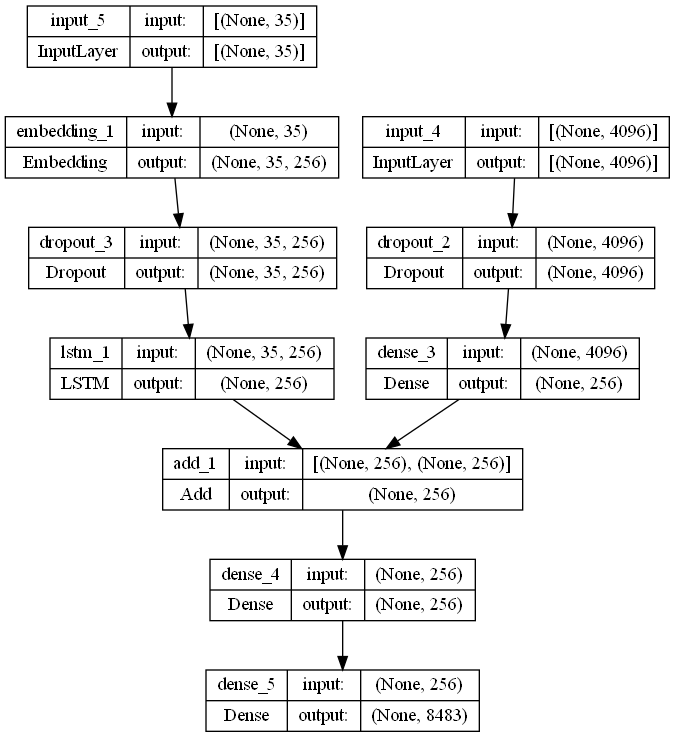

In [22]:
# encoder model
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)


# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
 
# plot the model
plot_model(model, show_shapes=True)

In [23]:
epochs = 5
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
	generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
	model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

227/227 [==============================] - 560s 2s/step - loss: 3.1187 - accuracy: 0.3209


In [25]:
model.save('best_model.h5')

In [26]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
        	return word
    return None

In [27]:
def predict_caption(model, image, tokenizer, max_length):
	in_text = 'start'

	for i in range(max_length):
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		sequence = pad_sequences([sequence], max_length)
		text = model.predict([image, sequence], verbose=0)
		text = np.argmax(text)
		word = idx_to_word(text, tokenizer)
		if word is None:
			break
		in_text += " " + word
		if word == 'end':
			break

	return in_text

In [29]:
from nltk.translate.bleu_score import corpus_bleu
actual, predicted = list(), list()

for key in test:
	captions = mapping[key]
	y_pred = predict_caption(model, features[key], tokenizer, max_length)
	actual_captions = [caption.split() for caption in captions]
	y_pred = y_pred.split()
	actual.append(actual_captions)
	predicted.append(y_pred)
    
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

BLEU-1: 0.567242
BLEU-2: 0.335462


In [36]:
from PIL import Image
import matplotlib.pyplot as plt

def generate_caption(image_name):
	image_id = image_name.split('.')[0]
	img_path = "../Images/"+image_name
	image = Image.open(img_path)
	captions = mapping[image_id]
	print('---------------------Actual---------------------')
	for caption in captions:
		print(caption)
	y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
	print('--------------------Predicted--------------------')
	print(y_pred)
	plt.imshow(image)

---------------------Actual---------------------
start  little girl covered in paint sits in front of painted rainbow with her hands in bowl  end
start  little girl is sitting in front of large painted rainbow  end
start  small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it  end
start  there is girl with pigtails sitting in front of rainbow painting  end
start  young girl with pigtails painting outside in the grass  end
--------------------Predicted--------------------
start two children are sitting on the tent with red tent end


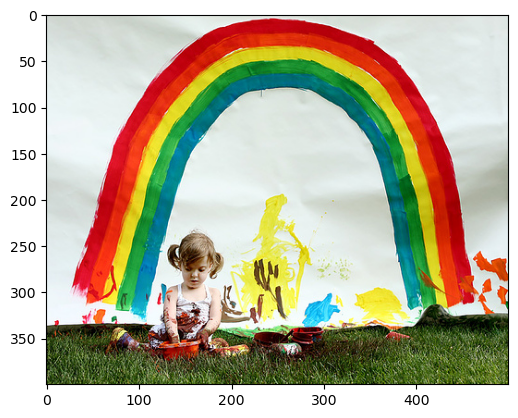

In [37]:
generate_caption("1002674143_1b742ab4b8.jpg")


In [38]:
vgg_model = VGG16() 
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

start group of people are standing in front of the mountains end


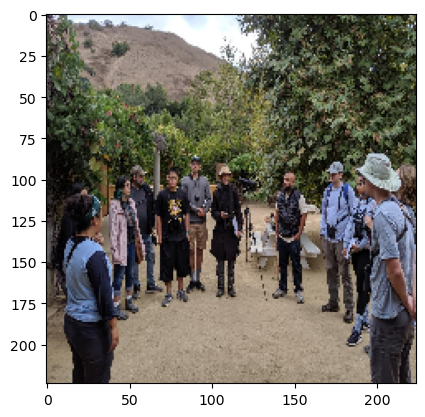

In [45]:
image_path = '1.jpg'

image1 = load_img(image_path, target_size=(224, 224))
image = img_to_array(image1)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

feature = vgg_model.predict(image, verbose=0)

x=predict_caption(model, feature, tokenizer, max_length)

plt.imshow(image1)
print(x)